# Beyond more/less segregation: 
## Quantifying and forecasting dynamics of residential segregation using Density-functional fluctuation theory

### INSTRUCTIONS
Here, we demonstrate the Density-Functional Fluctuation Theory (DFFT) approach to modeling residential segregation using versions of the classic Schelling model. We shall further place these methods into the broader context of classic indices of segregation. For a walkthrough using default parameters, just click the "Cell" dropdown menu then "Run all" and read through. For more interactive exploration, each cell of code is designed to run standalone. Within that cell, you can modify inputs to the simulations and see how those modifications impact the resulting analysis.


### The Schelling Model
Before we describe our methods, we first must introduce the Schelling Model, the first agent-based model, that we will use to demonstrate our methods. The Schelling model sought to demonstrate how even seemingly slight preferences for people to live next to neighbors of the same type can lead to drastic segregation. Since then, it has been extended and modified and studied by researchers from a variety of fields. In this work, we will use a stochastic version of the Schelling model to generate data. In our implementation, in each step, an agent and a destination are randomly chosen. The agent then looks at the the number of each type of neighbors in its current spot and the destination and calculate its change in utility, a function of the identity of its neighbors, and will choose to...
* definitely move here if it improves its utility.
* probabilistically move there depending on how much it decreases its utility.
In so doing, if the user-defined utility function increases with the nubmer of same-type neighbors, then segregation will ensue.

We here present three types of the above Schelling simulation.
1. Binary: Blue and red agents decide whether to swap positions in each step. This model provides the easiest to interpret analysis.
2. Binary with vacancies: Blue and red agents decide whether to move to empty positions. This model is the closest to the original Schelling model ad the model employed in our analysis published CITATION.
3. Trinary: Blue, red and green agents choose whether to swap positions in each step. This model demostrates how to extend methods to multiple subgroups

For each simulation, users are able to tune some or all of the following parameters.
* `frac_blue` -> The fraction of agents that are blue
* `frac_red` -> The fraction of agents that are red (only for simulations 2 and 3 above)
* `utility_function_blue` -> The utility a blue agent perceives when surrounded by a given number of blue agents in an 8-connected neighborhood. For example, if `utility_function_blue = [1,2,2,5,6,6,6,6,6]`, then the blue agent would experience an increase in utility of 4 if it moved from a position with 0 blue neighbors (utility = 1) to a position with 3 blue neighbors (utility = 5).
* `utility_function_red` and `utility_function_green` -> Same as `utility_function_blue` expect for red agents counting their red neighbors and green agents counting their green neighbors
* `utility_function_blue_red` -> NOT IMPLEMENTED YET For simulation 3 described above, blue agents additionally can count the number of red neighbors and move based on a utility function that incorporates the utility they experience with respect to this utility function. For example, if it is a linearly increasing utility function, then blue agents will prefer to live next to red agents versus green agents.

Additional, less relavant, parameters:
* `lattice_length` -> Edge length of the simulated city. The number of sites in the entire city is equal to `lattice_length^2`.
* `bin_length` -> Edge length of a neighborhood for gathering statistics. The number of sites in the entire city is equal to `bin_length^2`. `lattice_length` should be divisible by `bin_length`.
* `num_simulation_steps` -> Total number of times each agent is asked to move one time. Increase this variable to get better statistics, or decrease to make the simulation finish faster.

Run the next cell to see these parameters in action.


┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
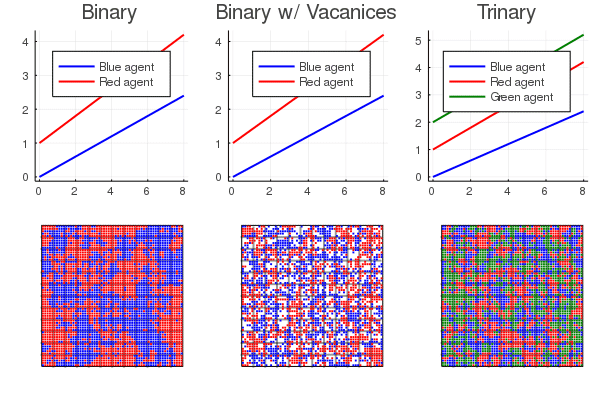

In [28]:
##############################
#USER DEFINED PARAMETERS
###########BINARY##############
frac_blue_binary = 0.5
utility_function_blue_binary = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_binary = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1

###########BINARY WITH vacancies##############
frac_blue_binary_w_vacancies = 0.33
frac_red_binary_w_vacancies = 0.33
utility_function_blue_binary_w_vacancies = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_binary_w_vacancies = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1

###########TRINARY##############
frac_blue_trinary = 0.33
frac_red_trinary = 0.33
utility_function_blue_trinary = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_trinary = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
utility_function_green_trinary = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+2

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_single_binary, lattice_snapshots_binary, utility_function_blue_binary, utility_function_red_binary =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue_binary,
    utility_function_blue = utility_function_blue_binary,
    utility_function_red = utility_function_red_binary,
    )

using StatsBase, StatsPlots, SpecialFunctions, Plots, Random
include("schelling_subfunctions.jl")
include("schelling_trinary_subfunctions.jl")
include("schelling_trinary_statistics.jl")
include("schelling_trinary_plots.jl")

counts_joint_binary_w_vacancies, lattice_snapshots_binary_w_vacancies,utility_function_blue_binary_w_vacancies,utility_function_red_binary_w_vacancies =
    run_schelling_sim_binary_vacancies(;
    frac_red_agents = frac_red_binary_w_vacancies,
    frac_blue_agents = frac_blue_binary_w_vacancies,
    utility_function_blue = utility_function_blue_binary_w_vacancies,
    utility_function_red = utility_function_red_binary_w_vacancies,
    )

counts_joint_trinary, lattice_snapshots_trinary,utility_function_blue_trinary,utility_function_red_trinary, utility_function_green_trinary =
    run_schelling_sim_trinary(;
    frac_red_agents = frac_red_trinary,
    frac_blue_agents = frac_blue_trinary,
    utility_function_blue = utility_function_blue_trinary,
    utility_function_red = utility_function_red_trinary,
    utility_function_green = utility_function_green_trinary,
    )

num_snapshots = size(lattice_snapshots_binary,3)
anim = @animate for i ∈ 1:num_snapshots
    plot_all_three_schelling_sims(
        lattice_snapshots_binary[:,:,i],counts_single_binary,utility_function_blue_binary,utility_function_red_binary,
        lattice_snapshots_binary_w_vacancies[:,:,i],counts_joint_binary_w_vacancies,utility_function_blue_binary_w_vacancies,utility_function_red_binary_w_vacancies,
        lattice_snapshots_trinary[:,:,i],counts_joint_trinary,utility_function_blue_trinary,utility_function_red_trinary,utility_function_green_trinary)
end

gif(anim, "tmp.gif", fps = 2)




### Traditional segregation indices can lead to oversimplification
The most common approach to quantifying segregation involves using either the Dissimilarity Index (D) or entropy-based Theil index (T). These indices quantify how far from evenly distributed people are across an area. Although a great deal of work has been done in fine-tuning and extending these indices to more complex scenarios, the fundamental issue with quantifying segregation with a single number is that a great deal of information about *how* the city is segregated is lost. To demonstrate this idea, the next three cells use distinct utility functions to simulate distinct cities with distinct histograms of neighborhood compositions, and yet are described by the same segregation indices. 


┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
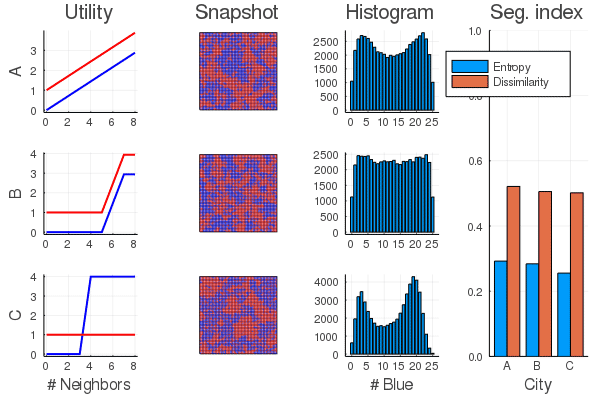

In [29]:
##### Binary segregation index comparison
###########CITY A ##############
utility_function_blue_A = 0.36.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_A = 0.36.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1

###########CITY B ##############
utility_function_blue_B = 0.735.*[0, 0, 0, 0, 0, 0, 2, 4, 4] 
utility_function_red_B = 0.735.*[0, 0, 0, 0, 0, 0, 2, 4, 4].+ 1

###########CITY C ##############
utility_function_blue_C = 1.0.*[0, 0, 0, 0, 4, 4, 4, 4, 4]
utility_function_red_C = 0.0.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+ 1

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_single_A, lattice_snapshots_A, utility_function_blue_A, utility_function_red_A =
    run_schelling_sim_binary(;
    lattice_length = 120,
    frac_blue_agents = 0.5,
    num_simulation_steps = 100,
    utility_function_blue = utility_function_blue_A,
    utility_function_red = utility_function_red_A,
    bin_length = 5
    )

counts_single_B, lattice_snapshots_B, utility_function_blue_B, utility_function_red_B =
    run_schelling_sim_binary(;
    lattice_length = 120,
    frac_blue_agents = 0.5,
    num_simulation_steps = 100,
    utility_function_blue = utility_function_blue_B,
    utility_function_red = utility_function_red_B,
    bin_length = 5
    )

counts_single_C, lattice_snapshots_C, utility_function_blue_C, utility_function_red_C =
    run_schelling_sim_binary(;
    lattice_length = 120,
    frac_blue_agents = 0.5,
    num_simulation_steps = 100,
    utility_function_blue = utility_function_blue_C,
    utility_function_red = utility_function_red_C,
    bin_length = 5
    )

num_snapshots = size(lattice_snapshots_A,3)
anim = @animate for i ∈ 1:num_snapshots
    segregation_indices_distributions_comparison_binary_figure(lattice_snapshots_A[:,:,i],counts_single_A,utility_function_blue_A,utility_function_red_A,
        lattice_snapshots_B[:,:,i],counts_single_B,utility_function_blue_B,utility_function_red_B,
        lattice_snapshots_C[:,:,i],counts_single_C,utility_function_blue_C,utility_function_red_C
        )
end

gif(anim, "tmp.gif", fps = 2)

### Note on reading a trinary plot
In the following simulations, since each neighborhood is constrained to have the same total number of sites with three types of possible ways to occupy a site, we visualize the statistics of these cities using a trinary plot. To read it, the vertex closest to the label, e.g. "Blue", represents a neighborhood with a composition of 100% blue agents. The edge opposite that vertex represents all possible compositions that have 0% blue ranging from 100% red to 100% green or vacant. 

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
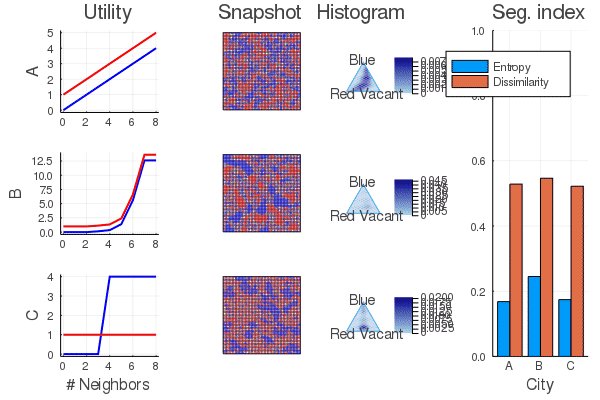

In [31]:
##### Binary with empties segregation index comparison
##############################
#USER DEFINED PARAMETERS

###########CITY A ##############
utility_function_blue_A = 0.5.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_A = 0.5.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1

###########CITY B ##############
utility_function_blue_B = 1.4 .*[0, 0, 0, 0.1, 0.25, 1, 4, 9, 9]
utility_function_red_B = 1.4 .*[0, 0, 0, 0.1, 0.25, 1, 4, 9, 9].+ 1

###########CITY C ##############
utility_function_blue_C = 1.0.*[0, 0, 0, 0, 4, 4, 4, 4, 4]
utility_function_red_C = 0.0.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+ 1

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_joint_A, lattice_snapshots_A,utility_function_blue_A,utility_function_red_A =
    run_schelling_sim_binary_vacancies(;
    lattice_length = 120,
    frac_red_agents = 0.33,
    frac_blue_agents = 0.33,
    num_simulation_steps = 100,
    utility_function_blue = utility_function_blue_A,
    utility_function_red = utility_function_red_A,
    bin_length = 5
    )

counts_joint_B, lattice_snapshots_B,utility_function_blue_B,utility_function_red_B =
    run_schelling_sim_binary_vacancies(;
    lattice_length = 120,
    frac_red_agents = 0.33,
    frac_blue_agents = 0.33,
    num_simulation_steps = 100,
    utility_function_blue = utility_function_blue_B,
    utility_function_red = utility_function_red_B,
    bin_length = 5
    )

counts_joint_C, lattice_snapshots_C ,utility_function_blue_C,utility_function_red_C =
    run_schelling_sim_binary_vacancies(;lattice_length = 120,frac_red_agents = 0.33,frac_blue_agents = 0.33,num_simulation_steps = 100,utility_function_blue = utility_function_blue_C,utility_function_red = utility_function_red_C,bin_length = 5)

num_snapshots = size(lattice_snapshots_A,3)
anim = @animate for i ∈ 1:num_snapshots
    segregation_indices_distributions_comparison_binary_w_vacancies(lattice_snapshots_A[:,:,i],counts_joint_A,utility_function_blue_A,utility_function_red_A,
        lattice_snapshots_B[:,:,i],counts_joint_B,utility_function_blue_B,utility_function_red_B,
        lattice_snapshots_C[:,:,i],counts_joint_C,utility_function_blue_C,utility_function_red_C
        )
end
gif(anim, "tmp.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
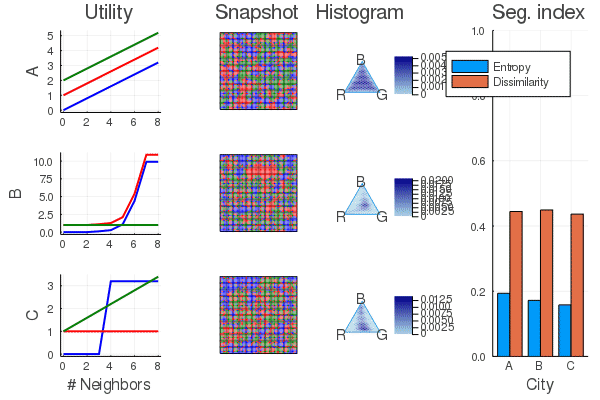

In [32]:
##### Trinary segregation index comparison
##############################
#USER DEFINED PARAMETERS

###########CITY A ##############
utility_function_blue_A = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_A = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
utility_function_green_A = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+2

###########CITY B ##############
utility_function_blue_B = 1.1 .*[0, 0, 0, 0.1, 0.25, 1, 4, 9, 9]
utility_function_red_B = 1.1 .*[0, 0, 0, 0.1, 0.25, 1, 4, 9, 9].+ 1
utility_function_green_B = 0.0.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1

###########CITY C ##############
utility_function_blue_C = 0.8.*[0, 0, 0, 0, 4, 4, 4, 4, 4]
utility_function_red_C = 0.0.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+ 1
utility_function_green_C = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_joint_A, lattice_snapshots_A,utility_function_blue_A,utility_function_red_A =
    run_schelling_sim_trinary(;
    utility_function_blue = utility_function_blue_A,
    utility_function_red = utility_function_red_A,
    utility_function_green = utility_function_green_A,
    )

counts_joint_B, lattice_snapshots_B,utility_function_blue_B,utility_function_red_B =
    run_schelling_sim_trinary(;
    utility_function_blue = utility_function_blue_B,
    utility_function_red = utility_function_red_B,
    utility_function_green = utility_function_green_B,
    )

counts_joint_C, lattice_snapshots_C ,utility_function_blue_C,utility_function_red_C =
    run_schelling_sim_trinary(;
    utility_function_blue = utility_function_blue_C,
    utility_function_red = utility_function_red_C,
    utility_function_green = utility_function_green_C,
    )

anim = @animate for i ∈ 1:size(lattice_snapshots_A,3)
    segregation_indices_distributions_comparison_trinary(
        lattice_snapshots_A[:,:,i],counts_joint_A,utility_function_blue_A,utility_function_red_A,utility_function_green_A,
        lattice_snapshots_B[:,:,i],counts_joint_B,utility_function_blue_B,utility_function_red_B,utility_function_green_B,
        lattice_snapshots_C[:,:,i],counts_joint_C,utility_function_blue_C,utility_function_red_C,utility_function_green_C,)
end
gif(anim, "tmp.gif", fps = 2)

### DFFT transformation of probability distribution
As shown above, a single index loses a great deal of information about the nature of the segregation that is retained within the probability distribution. We wish to retain all of the information within the probability distribution and to do so in a manner that is (1) interpretable and (2) predictive. To that end, we perform the following transformation to the probability distributions shown in column (3) of the plots above. Before reading ahead though, note that this notebook will walk you through the different steps of the math below and you do not need to understand all its elements at this point but simply that we are going to take the probability distributions and transform them in a special way that lets us decompose them into parts that describe the interactions between agents separately from the composition of the city overall, and moreover does it in a way that can be independent of the size of the neighborhood.

#### Binary DFFT transformation without empty cells
$-log(P(n_b)) - log((sn_b)!(sn_r)!) = sH(n_b) + C = s(f(n_b) + Vn_b) + C$

#### Binary DFFT transformation with empty cells
$-log(P(n_b,n_r)) - log((sn_b)!(sn_r)!(sn_e)!) = sH(n_b,n_r) + C = s(f(n_b,n_r) + V_bn_b + V_rn_r) + C$

#### Trinary DFFT transformation
$-log(P(n_b,n_r)) - log((sn_b)!(sn_r)!(sn_g)!) = sH(n_b,n_r) + C = s(f(n_b,n_r) + V_bn_b + V_rn_r) + C$

where
* $s$ is the total number of sites in a neighborhood
* $n_b$, $n_r$, $n_e$, and $n_g$ are the fraction of sites in the neighborhood that are blue, red, empty, and green respectively
* $P$ is the probability of observing a given composition
* $H$ is our DFFT function of the composition of a neighborhood
* $f$ represents the curvature of the Headache function that characterizes the social interactions between the agents. Specifically, it quantifies how the distribution deviates from a random distribution
* $V_b,V_r$ are constants that account for the number of people in the overall city that are blue or red respectively. These constants are analogous to the idea of "potential" from physics where there should be *fewer* agents in cities with *higher* values of $V$.
* $C$ is a constant shift that represents a normalization constant. This constant shift is arbitrary and can be ignored.

The next three cells will now allow you to explore the above described statistical decomposition. Within each figure, you will see the... 
1. user-defined utility functions,
2. snaphots from the Schelling simulation,
3. observed probability distributions,
4. $H$ function along with its decomposition into a curvature function, $f$, and a linear part $Vn$. (Note that the curvature function $f$ is shifted so that f(0) = f(1) = 0 although this is arbitrary as we will discuss later)


┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
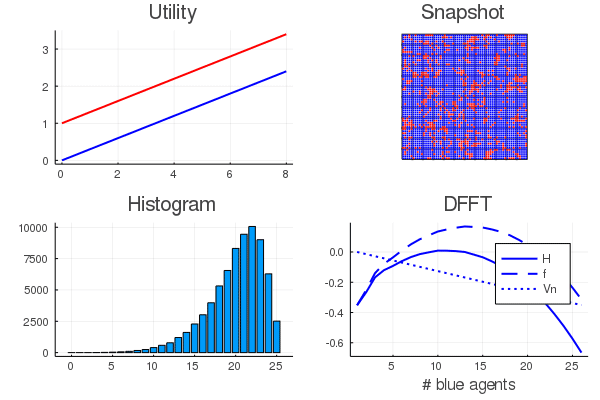

In [33]:
##### Binary H decomposition
##############################
#USER DEFINED PARAMETERS
frac_blue = 0.8
utility_function_blue = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
bin_length = 5 #lattice_length of default 60 should be divisible by bin_length

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_single, lattice_snapshots, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length
    )

anim = @animate for i ∈ 1:size(lattice_snapshots,3)
    intro_headache_binary_figures(lattice_snapshots[:,:,i],counts_single,utility_function_blue,utility_function_red)
end
gif(anim, "tmp.gif", fps = 2)


#### Note on decomposition of H functions with three components
For three components, there are 2 independent parameters, $V_b,V_r$ describing the overall compositions of the city. The composition of the third component can be determined by these two constants since $n_b+n_r+n_g = 1$ for the trinary case. 

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
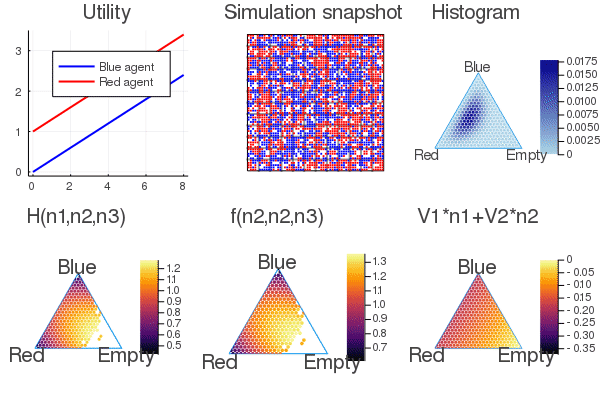

In [34]:
##### Binary with empties H decomposition
#######################################
#USER DEFINED PARAMETERS
frac_blue = 0.4
frac_red = 0.4
utility_function_blue = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.3.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
bin_length = 5 #lattice_length of default 60 should be divisible by bin_length

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_joint, lattice_snapshots,utility_function_blue,utility_function_red =
    run_schelling_sim_binary_vacancies(;
    frac_red_agents = frac_red,
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    )

anim = @animate for i ∈ 1:size(lattice_snapshots,3)
    intro_headache_binary_w_vacancies_figures(lattice_snapshots[:,:,i],counts_joint,utility_function_blue,utility_function_red)
end
gif(anim, "tmp.gif", fps = 2)



┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
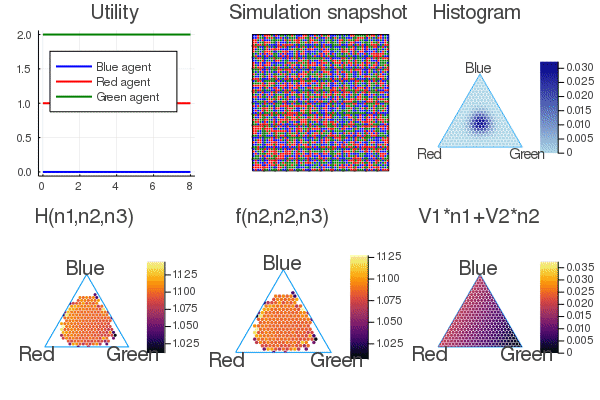

In [35]:
##### Trinary H decomposition
#######################################
#USER DEFINED PARAMETERS
frac_blue = 0.33
frac_red = 0.33
utility_function_blue = 0.2.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.2.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
utility_function_green = 0.2.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+2
bin_length = 5 #lattice_length of default 60 should be divisible by bin_length

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_joint, lattice_snapshots,utility_function_blue,utility_function_red =
    run_schelling_sim_trinary(;
    frac_red_agents = frac_red,
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    utility_function_green = utility_function_green,
    )

anim = @animate for i ∈ 1:size(lattice_snapshots,3)
    intro_headache_trinary_figures(lattice_snapshots[:,:,i],counts_joint,utility_function_blue,utility_function_red,utility_function_green)
end
gif(anim, "tmp.gif", fps = 2)


## Why use a DFFT transformation to quantify segregation?
Now that we have explored how we transform a probability distribution into our DFFT functions, we should answer *why* we do it. In the sections to come, we will demonstrate the following benefits over simply looking at the raw probability distributions.

1. Compositional invariance: Any quantification of segregation should be separate from the effects of the composition of the city as a whole. For example, we might want to compare two cities with overall composition differences. Additionally, we might want to see if a cities segregation is changing over time.
2. Interpretability: Looking only at the raw probability distributions, it is not immediately obvious how the city is segregated. The $H$ function provides a path towards an interpretation.
3. Forecasting: This decomposition allows us to forecast how neighborhoods are going to change into the future even in the event of a change in the overall composition of the city.
4. Sample size independence: When looking at empirical data, rarely do we have access to choosing the neighborhood size with which to coarse grain a city. For example, the US census provides counts of the number of persons by race in census defined spatial blocks of varying size, but not the individual locations of people due to privacy concerns. Our framework, then, must be capable of remove the effect of sampling over neighborhoods with different total numbers of people.

### Interpretation of DFFT functions
What does this $H$ function even mean? A measure of segregation should have an interpretation that practicioners can understand. For example, the dissimilarity index is widely used even though statisticians agree that the entropy-based measure is generally superior. That is because the dissimilarity index has an easy interpretation, that of measuring how many people in the city would need to move in order for every neighborhood to have the exact same composition. Even this interpretation has flaws (if every neighborhood has the exact same composition, then that means not only is the city not segregated, there is some strong forces making them all the same composition instead of randomly distributed) but it is easy to understand.

One way to interpret our $H$ function is to instead consider another simulation driven by neighborhood compositions we shall refer to as a composition-based simulation. Consider, for example, the binary simulation with only red and blue agents. In our DFFT simulation, our neighborhood will be disconnected from the rest of the city. Instead, in each step an agent is randomly selected and has to chose whether to remain the same color or switch to becoming the other color with a rate (aka probability) of changing an agent of identity $i$ to identity $j$ of
$R_{i->j}(n_b) = 1/(1+e^{\Delta H})$
where $\Delta H$ represents the proposed change in the $H$ function (e.g. for a blue agent $H(n_b-1/s) - H(n_b)$).

Neighborhoods with agents switching colors based on the composition of the whole neighborhood will exactly reproduce the probability distribution from which the $H$ function was drawn. Thus, the $H$ function can be seen as a penalty function that neighborhoods use to consider whether to change their composition or not. 
Moreover, the $H$ function represents this choice in a way that is separate from the pesky statistics and combinatorics involved when counting the number of people in the neighborhood. For example, if a city is completely random, then the $H$ function is a straight line (or flat plane) whose slope simply represents the probability of a random person being blue (or red).

What is more, we have shown that this composition-based simulation not only provides intuition about what the $H$ function means, but it even works to forecast how a neighrborhood with a given initial composition is likely to change into the future. To visualize this for a binary simulation, we shall plot a transition matrix that we evolve forward in time. Specifically, each column of the plot represents a neighborhood that happened to start with an initial composition shown on the x-axis. The y-axis represents all the possible future compositions and the changing shading shows how the probability of observing that future composition at future times.  

To help visualize this neighborhood composition-driven model, the next cell will run a Schelling simulation and then plot...
1. User-defined utility functions
2. Single snapshot of the Schelling simulation
3. Histogram
4. H function
5. Rate function, $R_{b->r}(n_b)$ at which, if a blue agent is randomly chosen in a neighborhood of composition $n_b$, it will change into a red agent.
6. Forecasted probability (shading) of observing a future the composition (y-axis) of a neighborhood given an initial composition (x-axis).

You will also see a new variable below, `t_interval`. This variable will allow you to tune how many steps pass between each frame in the plot described in point 6 above. Increase this variable to see further into the future. After enough time, the probability distributions shown in the columns of plot 6 should match the histogram desribed above in plot 3. 
Also, misleading plots or errors occur if, throughout the course of the simulation, not every possible composition has been observed. To ensure this, use utility functions that encourage segregation, use a smaller `bin_length`, and use a larger `num_simulation_steps` to collect more statistics.

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
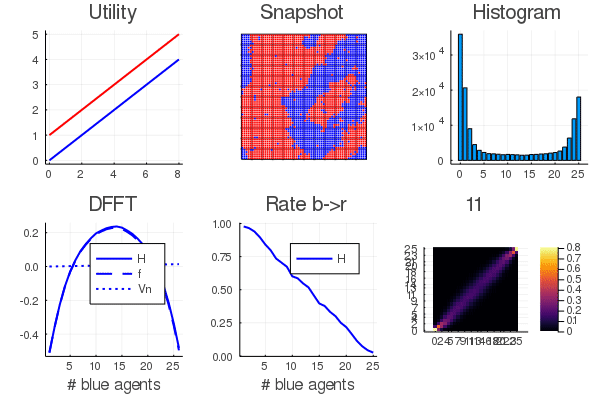

In [37]:
#Binary H interpretation
frac_blue = 0.4
utility_function_blue = 0.5.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.5.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
bin_length = 5 #lattice_length (default 60) should be divisible by bin_length
t_interval = 10
num_simulation_steps = 1000

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_single, lattice_snapshots, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length,
    num_simulation_steps = num_simulation_steps
    )

anim = @animate for i ∈ 1:size(lattice_snapshots,3)
    interpretation_headache_binary_figures(lattice_snapshots[:,:,i],counts_single,utility_function_blue,utility_function_red,Int(1+i*t_interval))
end
gif(anim, "tmp.gif", fps = 2)


#### Note on rate functions for three components
For simulations with three types of occupancies, we must now plot three possible transitions...
1. blue -> red
2. blue -> vacant (or blue -> green)
3. red -> vacant (or red -> green)

I will not plot any of the reverse rates which can be exactly determined from the three rates above.

Subsequently, we also cannot visualize simultaneously how each initial composition will evolve into the future. For that reason, you will find two parameters `initial_number_blue` and `initial_number_red` that you can tune to 

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
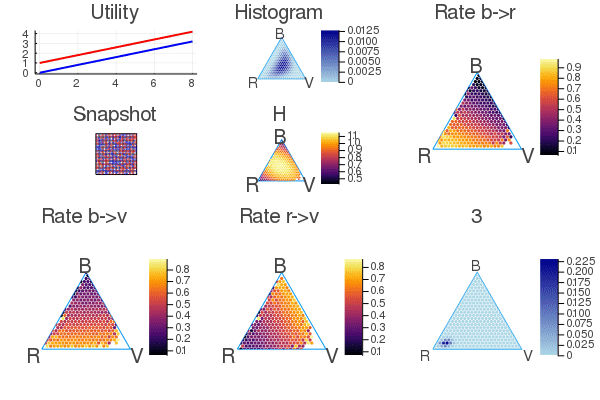

In [22]:
#Binary with vacancies H interpretation
## Interpretation of H function Binary with Vacancies
#######################################
#USER DEFINED PARAMETERS
frac_blue = 0.33
frac_red = 0.33
utility_function_blue = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
bin_length = 5 #lattice_length of default 60 should be divisible by bin_length
t_interval = 2
num_simulation_steps = 100000
initial_number_blue = 2
initial_number_red = 20

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_joint, lattice_snapshots,utility_function_blue,utility_function_red =
    run_schelling_sim_binary_vacancies(;
    frac_red_agents = frac_red,
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    )

anim = @animate for i ∈ 1:size(lattice_snapshots,3)
    interpretation_headache_binary_w_vacancies_figures(lattice_snapshots[:,:,i],
        counts_joint,
        utility_function_blue,
        utility_function_red,
        Int(1+i*t_interval),
        initial_number_blue,
        initial_number_red,
        )
end
gif(anim, "tmp.gif", fps = 2)


┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
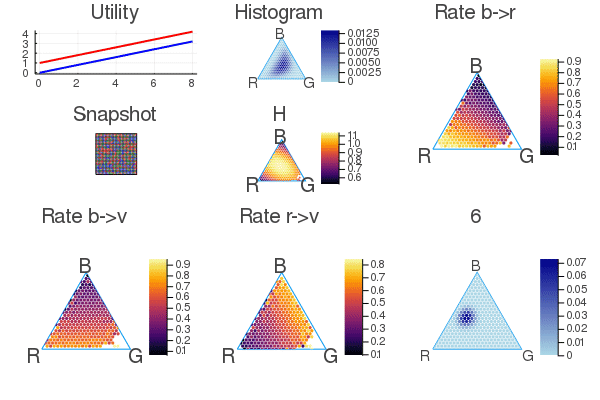

In [27]:
#Trinary H interpretation
## Interpretation of H function Trinary
#######################################
#USER DEFINED PARAMETERS
frac_blue = 0.33
frac_red = 0.33
utility_function_blue = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
utility_function_green = 0.0.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+2
bin_length = 5 #lattice_length of default 60 should be divisible by bin_length
t_interval = 5
num_simulation_steps = 10000
initial_number_blue = 10
initial_number_red = 10

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_joint, lattice_snapshots,utility_function_blue,utility_function_red =
    run_schelling_sim_trinary(;
    frac_red_agents = frac_red,
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    utility_function_green = utility_function_green,
    )

anim = @animate for i ∈ 1:size(lattice_snapshots,3)
    interpretation_headache_trinary_figures(lattice_snapshots[:,:,i],
        counts_joint,
        utility_function_blue,
        utility_function_red,
        utility_function_green,
        Int(1+i*t_interval),
        initial_number_blue,
        initial_number_red,
        )
end
gif(anim, "tmp.gif", fps = 2)

### Compositional invariance
We must ensure that $H$ functions for two cities with the same segregation behavior but different city-wide compositions should share the same segregation function, $f$, but possess different constants, $V_b,V_r$ .

As an important note, no method to date, including the standard segregation indices, can guarantee compositional invariance for any arbitrary population, and that applies to our DFFT method as well. We can only guarantee compositional invariance under the assumption that neighborhood compositions are sufficient descriptors of the system. If, for example, the organization of agents within the neighborhood is important, then our method will not be exact. 
This section, then, serves only to demonstrate that changes in the city-wide composition are *approximately* reflected by shift in the variable $V$. We have, however, shown that this approximation is very good across a range of reasonable Schelling simulations and powerful enough to make very accurate forecasts of population dynamics CITATION.

To confirm compositional invariance, the next cell uses the same utility function for three cities with different overall compositions given by `frac_blue`. We show for the binary simulation...
1. the shared utility function across all three cities
2. snapshots of the cities
3. $H$ functions for all three cities
4. Segregation function, $f$

For brevity, we omit the three component test of compositional invariance.

Compositional invariance in the DFFT framework, then, consists of these three $f$ functions being the same even as the composition of the city changes. We have utilized this property not only to compare cities of different overall compositions, but also to forecast how a city will change in response to a change in its overall composition.


┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
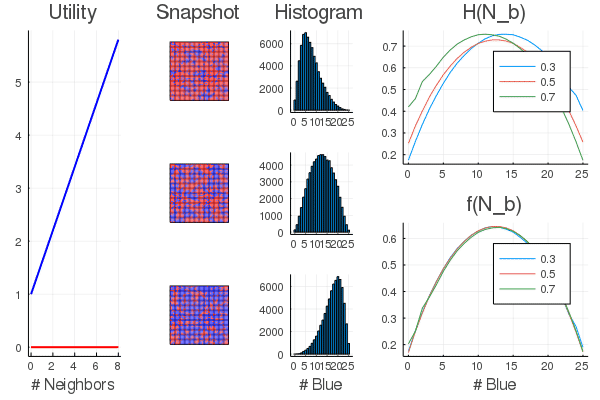

In [38]:
##### Binary H compositional invariance
## BINARY Composition Invariance
#######################################
#USER DEFINED PARAMETERS
fraction_blue_1 = 0.3
fraction_blue_2 = 0.5
fraction_blue_3 = 0.7

utility_function_blue = 0.6 .* [0, 1, 2, 3, 4, 5, 6, 7, 8] .+ 1
utility_function_red = 0.0 .* [0, 1, 2, 3, 4, 5, 6, 7, 8]

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_single_1, lattice_snapshots_1, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;frac_blue_agents = fraction_blue_1,utility_function_blue = utility_function_blue,utility_function_red = utility_function_red)

counts_single_2, lattice_snapshots_2, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;frac_blue_agents = fraction_blue_2,utility_function_blue = utility_function_blue,utility_function_red = utility_function_red)

counts_single_3, lattice_snapshots_3, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;frac_blue_agents = fraction_blue_3,utility_function_blue = utility_function_blue,utility_function_red = utility_function_red)

anim = @animate for i ∈ 1:size(lattice_snapshots_1,3)
    compositional_invariance_binary_figure(lattice_snapshots_1[:,:,i],counts_single_1,fraction_blue_1,lattice_snapshots_2[:,:,i],counts_single_2,fraction_blue_2,lattice_snapshots_3[:,:,i],counts_single_3,fraction_blue_3,utility_function_blue,utility_function_red)
end
gif(anim, "tmp.gif", fps = 2)


### Sample size invariance
One last important test is that of sample size invariance. In order to fit empirical data of humans, we must accommodate data where each "neighborhood" is going to be of a different size. As an example, US Census counts people down to a block level resoultion that can contain from 0 persons all the way up to many hundreds. Although DFFT has a dependence on the sample size, $s$, built into it, we cannot guarantee that our $H$ function is actually independent of the sample $s$ since, as we have increase our neighborhood size, we may well observe different behaviors. We *can* however emprically investigate whether our DFFT functions are independent of the sample size. We do so in the following cell for the binary simulation (we again omit the three component analysis for clarity). Specifically, we plot...

1. the shared utility function across all three cities
2. snapshots of the cities that should have the same behavior
3. Histograms using the three different neighborhood sizes
4. $H$ functions for all three neighborhood sizes

Sample size invariance is observed when the $H$ functions are the same up to a constant shift for different neighborhood sizes defined by `bin_length`. Note that for larger neighborhood sizes, there will inevitably be missing data. 

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT_analysis_Schelling_model/tmp.gif")
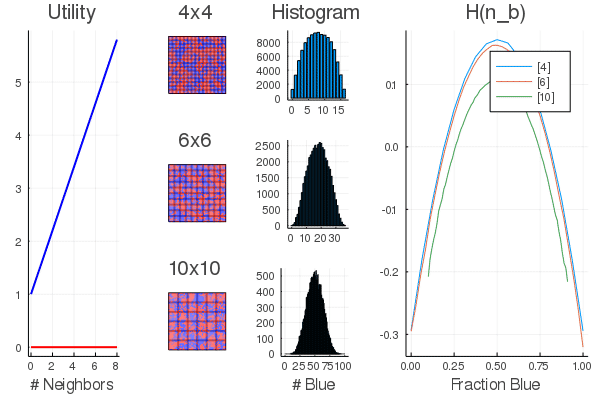

In [40]:
#Sample size invariance Binary
## BINARY Sample Size Invariance
#######################################
#USER DEFINED PARAMETERS
lattice_length = 60
bin_length_1 = 4 #Lattice_length should be divisible by bin_length
bin_length_2 = 6
bin_length_3 = 10

frac_blue = 0.5
utility_function_blue = 0.6 .* [0, 1, 2, 3, 4, 5, 6, 7, 8] .+ 1
utility_function_red = 0.0 .* [0, 1, 2, 3, 4, 5, 6, 7, 8]

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")
counts_single_1, lattice_snapshots_1, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length_1,
    lattice_length = lattice_length
    )

counts_single_2, lattice_snapshots_2, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length_2,
    lattice_length = lattice_length
    )

counts_single_3, lattice_snapshots_3, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length_3,
    lattice_length = lattice_length
    )

anim = @animate for i ∈ 1:size(lattice_snapshots_1,3)
    sample_size_invariance_binary_figure(lattice_snapshots_1[:,:,i],counts_single_1,fraction_blue_1,
        lattice_snapshots_2[:,:,i],counts_single_2,fraction_blue_2,
        lattice_snapshots_3[:,:,i],counts_single_3,fraction_blue_3,
        utility_function_blue,utility_function_red)
end
gif(anim, "tmp.gif", fps = 2)


# Application to US Census data
Finally, we come to the point where we can investigate how this method can extend to human data. Specifically, does this method work on human data? We save detailed analysis of human data for a notebook coming soon, but we leave here a preliminary result that suggests that our methods can not only provide new insights into the nature of residential populations, it can even forecast how neighborhoods are likely to change!

Shown below is a forecast using methods similar to those described above. We forecast the probability (shading) of finding a composition in the year 2010 of non-Hispanic White persons (y-axis) in a neighborhood that starts with a given initial composition (x-axis) in the year 2000 for the four most populus counties in the US. We then overlay points representing the observed dynamics of neighborhood compositions and see quantitative agreement between the dynamics of neighborhoods and our forecasts. Specifically, while White populations across all four counties were known to proportionally decrease, our forecasts was able to capture quantitatively the trend that the neighborhoods that experienced the greatest decrease in White composition were the more integrated neighborhoods. These integrated neighborhoods decreased faster than would be expected by a simple proportional shift (shown by the straight yellow line). Meanwhile, predominantly White neighborhoods continued to stay predominantly White and our method was able to capture that as well. 

We wish to emphasize that this is a first-of-its-kind demographic forecast. Typically, population forecasts work on much larger scales, thus no method to date has been developed to do neighborhood scale forecasts that account for the effects of segregation. Stay tuned to see forecasts of your neighborhood of choice soon! 

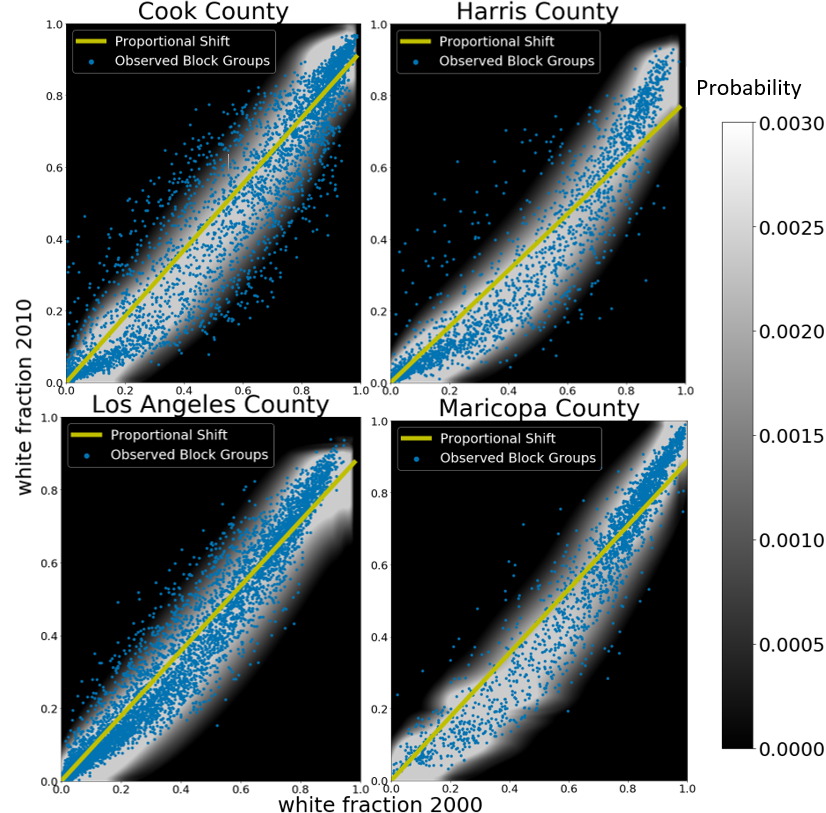